In [1]:
#!pip install sklearn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import math

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from warnings import simplefilter

pd.options.mode.chained_assignment = None  # default='warn'import pandas as pd
pd.set_option('display.precision', 5)

In [26]:
df = pd.read_csv('train.csv')
df

id        date  year_week  product_number  reporterhq_id   
0        202119-6909  2021-05-15     202119            6909             93  \
1        202120-6909  2021-05-22     202120            6909             93   
2        202121-6909  2021-05-29     202121            6909             93   
3        202122-6909  2021-06-05     202122            6909             93   
4        202123-6909  2021-06-12     202123            6909             93   
...              ...         ...        ...             ...            ...   
15449  202317-247737  2023-04-29     202317          247737             15   
15450  202317-247737  2023-04-29     202317          247737             24   
15451  202318-247737  2023-05-06     202318          247737              3   
15452  202318-247737  2023-05-06     202318          247737             15   
15453  202318-247737  2023-05-06     202318          247737             24   

      prod_category  specs  display_size  segment  sales_units   
0             Arale  21274          13.3  Premium          2.0  \
1             Arale  21274          13.3  Premium          0.0   
2             Arale  21274          13.3  Premium          3.0   
3             Arale  21274          13.3  Premium          0.0   
4             Arale  21274          13.3  Premium          0.0   
...             ...    ...           ...      ...          ...   
15449         Arale  10637          13.3  Premium          0.0   
15450         Arale  10637          13.3  Premium          0.0   
15451         Arale  10637          13.3  Premium         22.0   
15452         Arale  10637          13.3  Premium         68.0   
15453         Arale  10637          13.3  Premium          5.0   

       inventory_units  
0                 35.0  
1                 70.0  
2                137.0  
3                274.0  
4                333.0  
...                ...  
15449             62.0  
15450              3.0  
15451              0.0  
15452             78.0  
15453              1.0  

[15454 rows x 11 columns]

In [27]:
grouped = df.groupby('product_number') #grouped['product_number']
grouped_list = [grouped.get_group(x) for x in grouped.groups]

In [64]:
# def fill_gaps(data):
#   sale_inv = list(zip(data['sales_units'],data['inventory_units']))
#   for i in range(len(sale_inv)):
#     last_inv = 0
#     next_inv = 0
#     (act_sales, act_inv) = sale_inv[i]
#     if i > 0: 
#       (last_sales, last_inv) = sale_inv[i-1]
#     if i < len(sale_inv)-1:     
#       (next_sales, next_inv) = sale_inv[i+1]

#     if math.isnan(act_sales) and math.isnan(act_inv):
#       act_inv = (last_inv+next_inv)/2
#     if math.isnan(act_inv):
#       act_inv = last_inv - act_sales
#       sale_inv[i] = (act_sales, act_inv)
#     elif math.isnan(act_sales):
#       act_sales = last_inv - act_inv
#       sale_inv[i] = (act_sales, act_inv)

#   data = data.drop(['sales_units', 'inventory_units'], axis=1)

#   new_data = pd.DataFrame(sale_inv, columns=['sales_units', 'inventory_units'])
#   data = pd.concat([data,new_data],axis=1)

#   return data

In [30]:
for prod in grouped_list:

    # Data preparation
    # ==============================================================================

    # Format the date
    prod['date'] = pd.to_datetime(prod['date'], format='%Y-%m-%d')
    # Convert year_week into weeks 0-max
    prod['year'] = round(prod['year_week']/100)
    first_year = min(prod['year'])
    prod['week'] = ((prod['year_week']/100)%1)*100
    prod['week'] = prod['week'] + (52*(prod['year']-first_year))

    #prod.drop('specs', axis=1, inplace=True)
    #prod.drop('segment', axis=1, inplace=True)
    #prod.drop('display_size', axis=1, inplace=True)
    
    print(prod.columns)
    # sale_inv = list(zip(prod['sales_units'],prod['inventory_units']))
    # for i in range(len(sale_inv)):
    #     last_inv = 0
    #     next_inv = 0
    #     (act_sales, act_inv) = sale_inv[i]
    #     if i > 0:
    #         (last_sales, last_inv) = sale_inv[i-1]
    #     if i < len(sale_inv)-1:     
    #         (next_sales, next_inv) = sale_inv[i+1]
    #     if not math.isnan(act_sales) and not math.isnan(act_inv):
    #         pass
    #     elif math.isnan(act_sales) and not math.isnan(act_inv):
    #         act_sales = last_inv - act_inv
    #         sale_inv[i] = (act_sales, act_inv)
    #     elif not math.isnan(act_sales) and math.isnan(act_inv):
    #         act_inv = last_inv - act_sales
    #         sale_inv[i] = (act_sales, act_inv)
    #     else:
    #         act_inv = (last_inv+next_inv)/2
    #         sale_inv[i] = (0, act_inv)

    # prod[['sales_units', 'inventory_units']] = pd.DataFrame(sale_inv, columns=['sales_units', 'inventory_units'])

    prod['sales_units'] = prod['sales_units'].fillna(0)
    prod['inventory_units'] = prod['inventory_units'].fillna(0) 


    #   # Checking
    # sale_inv = list(zip(prod['sales_units'],prod['inventory_units']))
    # #print(sale_inv)
    # non_sales = 0
    # non_inv = 0
    # non_non = 0
    
    # for i in range(len(sale_inv)):
    #     (sales, inv) = sale_inv[i]
    #     if math.isnan(sales) and math.isnan(inv):
    #         non_non += 1
    #     elif math.isnan(inv):
    #         non_inv += 1
    #     elif math.isnan(sales):
    #         non_sales += 1


    # print("NaN Nothing: " + str(non_non))
    # print("NaN inventory: " + str(non_inv))
    # print("NaN sales: " + str(non_sales))
    

    print(prod.columns)
    

Index(['id', 'date', 'year_week', 'product_number', 'reporterhq_id',
       'prod_category', 'specs', 'display_size', 'segment', 'sales_units',
       'inventory_units', 'year', 'week'],
      dtype='object')
Index(['id', 'date', 'year_week', 'product_number', 'reporterhq_id',
       'prod_category', 'specs', 'display_size', 'segment', 'sales_units',
       'inventory_units', 'year', 'week'],
      dtype='object')
Index(['id', 'date', 'year_week', 'product_number', 'reporterhq_id',
       'prod_category', 'specs', 'display_size', 'segment', 'sales_units',
       'inventory_units', 'year', 'week'],
      dtype='object')
Index(['id', 'date', 'year_week', 'product_number', 'reporterhq_id',
       'prod_category', 'specs', 'display_size', 'segment', 'sales_units',
       'inventory_units', 'year', 'week'],
      dtype='object')
Index(['id', 'date', 'year_week', 'product_number', 'reporterhq_id',
       'prod_category', 'specs', 'display_size', 'segment', 'sales_units',
       'inventory_un

6909
Train dates : 0 --- 109  (n=110)
Test dates  : 110 --- 136  (n=27)
7896
Train dates : 137 --- 247  (n=111)
Test dates  : 248 --- 274  (n=27)
8883
Train dates : 275 --- 422  (n=148)
Test dates  : 423 --- 459  (n=37)
9870
Train dates : 460 --- 583  (n=124)
Test dates  : 584 --- 613  (n=30)
10857
Train dates : 614 --- 745  (n=132)
Test dates  : 746 --- 778  (n=33)
11844
Train dates : 779 --- 931  (n=153)
Test dates  : 932 --- 969  (n=38)
12831
Train dates : 970 --- 1068  (n=99)
Test dates  : 1069 --- 1092  (n=24)
14805
Train dates : 1093 --- 1202  (n=110)
Test dates  : 1203 --- 1229  (n=27)
17766
Train dates : 1230 --- 1392  (n=163)
Test dates  : 1393 --- 1432  (n=40)
24675
Train dates : 1433 --- 1618  (n=186)
Test dates  : 1619 --- 1664  (n=46)
25662
Train dates : 1665 --- 1792  (n=128)
Test dates  : 1793 --- 1823  (n=31)
30597
Train dates : 1824 --- 1995  (n=172)
Test dates  : 1996 --- 2037  (n=42)
32571
Train dates : 2038 --- 2207  (n=170)
Test dates  : 2208 --- 2249  (n=42)
33558

/var/folders/s1/h3mlm3qx719csw5jbkn6fcbh0000gn/T/ipykernel_29206/3755502061.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7, 3))


Train dates : 3983 --- 4090  (n=108)
Test dates  : 4091 --- 4116  (n=26)
62181
Train dates : 4117 --- 4234  (n=118)
Test dates  : 4235 --- 4263  (n=29)
64155
Train dates : 4264 --- 4405  (n=142)
Test dates  : 4406 --- 4440  (n=35)
65142
Train dates : 4441 --- 4548  (n=108)
Test dates  : 4549 --- 4575  (n=27)
73038
Train dates : 4576 --- 4693  (n=118)
Test dates  : 4694 --- 4722  (n=29)
75012
Train dates : 4723 --- 4890  (n=168)
Test dates  : 4891 --- 4931  (n=41)
77973
Train dates : 4932 --- 5023  (n=92)
Test dates  : 5024 --- 5046  (n=23)
80934
Train dates : 5047 --- 5193  (n=147)
Test dates  : 5194 --- 5229  (n=36)
81921
Train dates : 5230 --- 5357  (n=128)
Test dates  : 5358 --- 5388  (n=31)
82908
Train dates : 5389 --- 5524  (n=136)
Test dates  : 5525 --- 5557  (n=33)
83895
Train dates : 5558 --- 5653  (n=96)
Test dates  : 5654 --- 5677  (n=24)
86856
Train dates : 5678 --- 5823  (n=146)
Test dates  : 5824 --- 5859  (n=36)
87843
Train dates : 5860 --- 5989  (n=130)
Test dates  : 599

137     17.0
138     31.0
139     64.0
140     55.0
141     49.0
       ...  
243    156.0
244     63.0
245    197.0
246    113.0
247    107.0
Name: inventory_units, Length: 111, dtype: float64

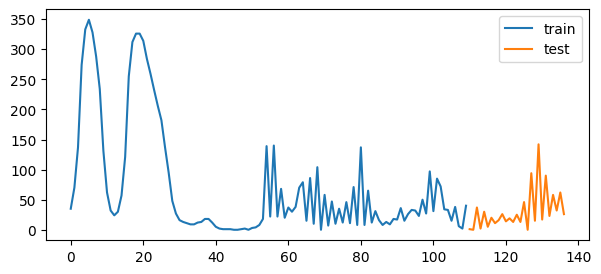

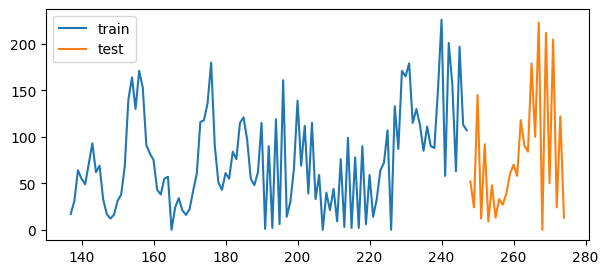

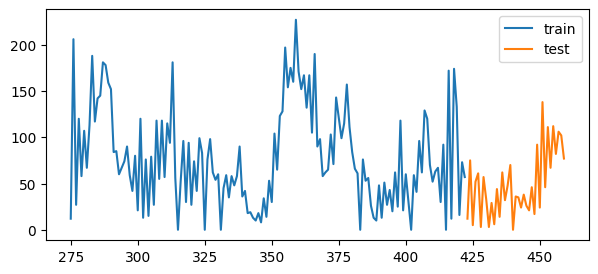

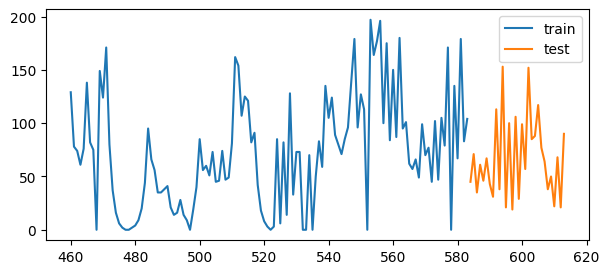

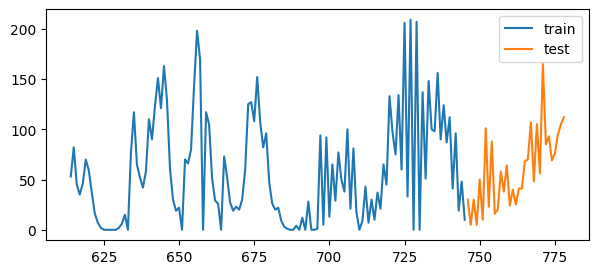

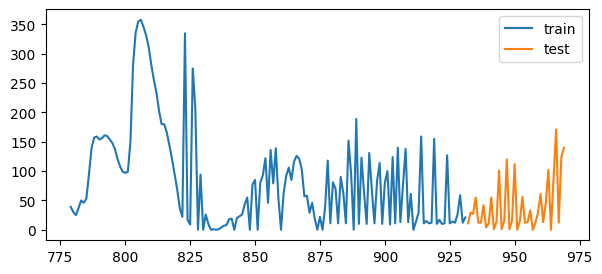

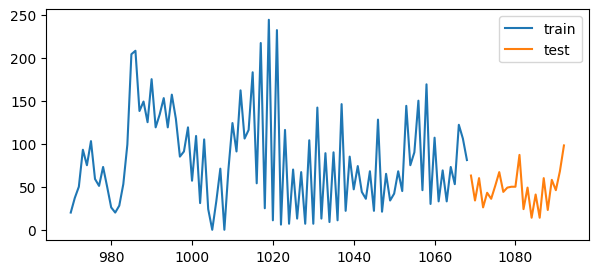

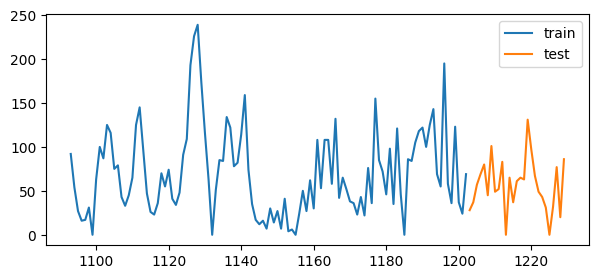

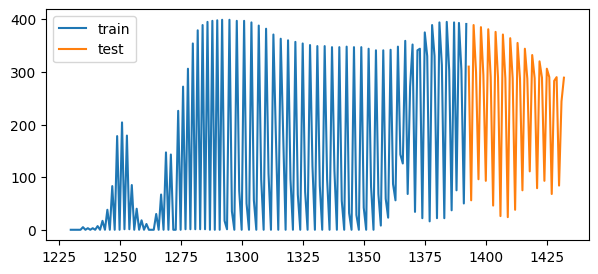

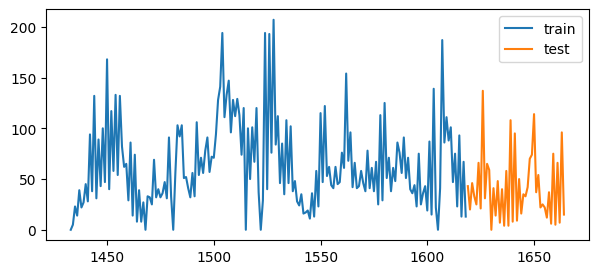

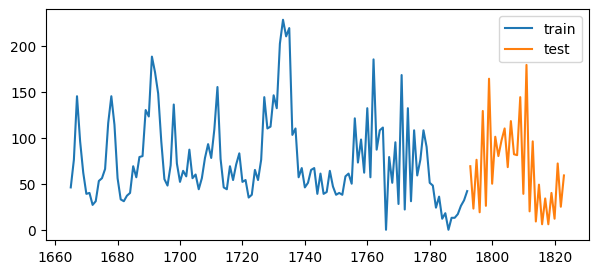

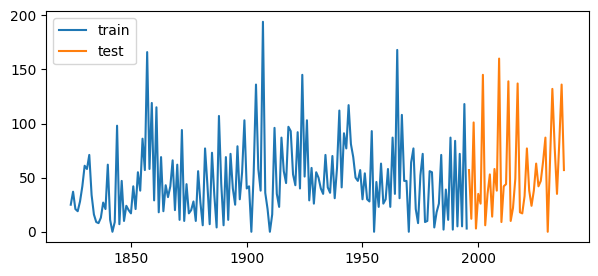

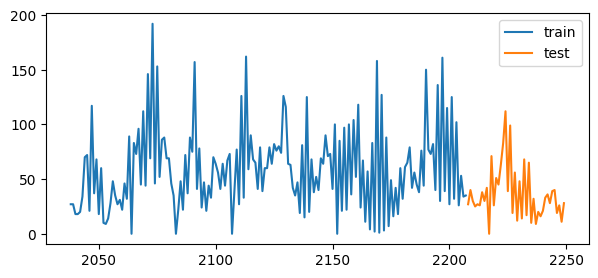

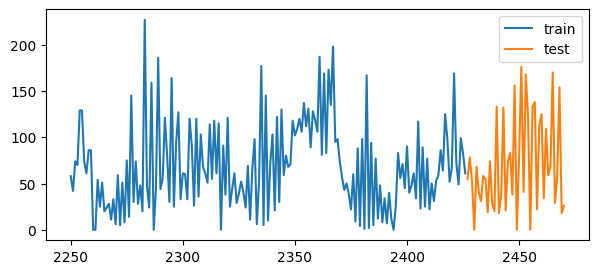

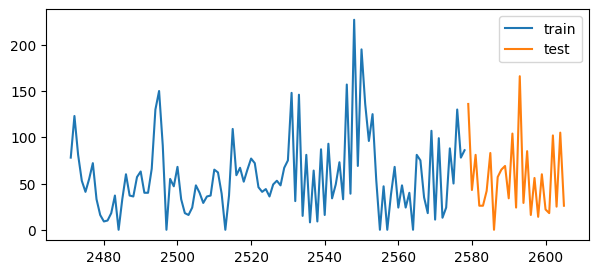

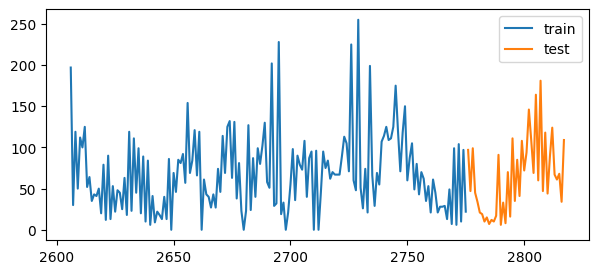

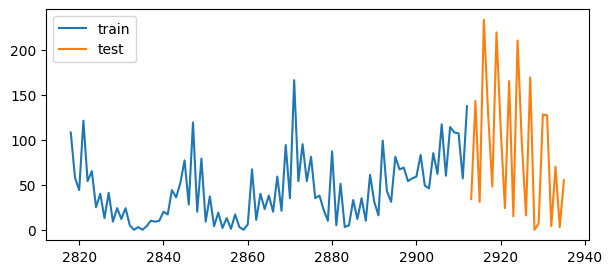

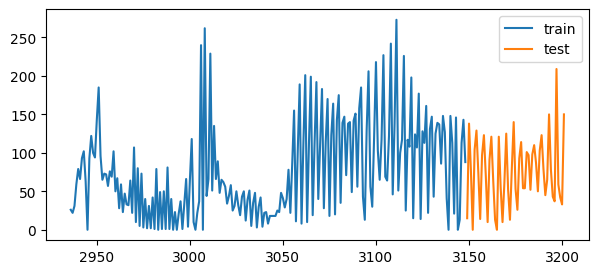

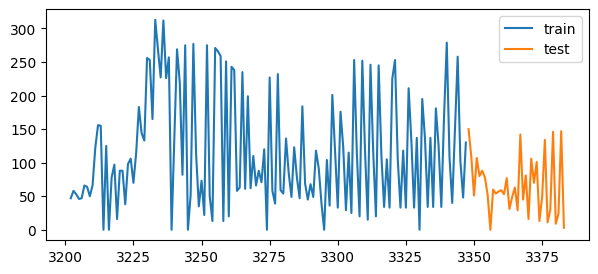

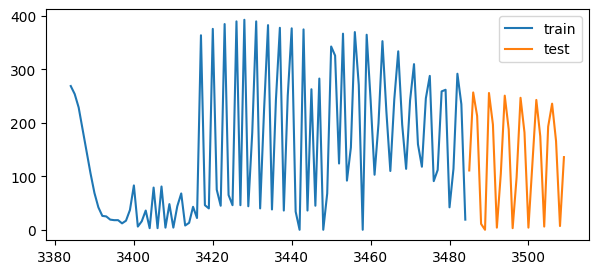

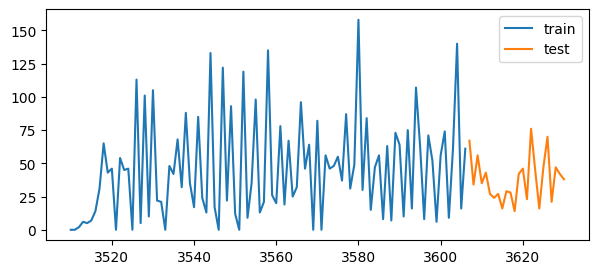

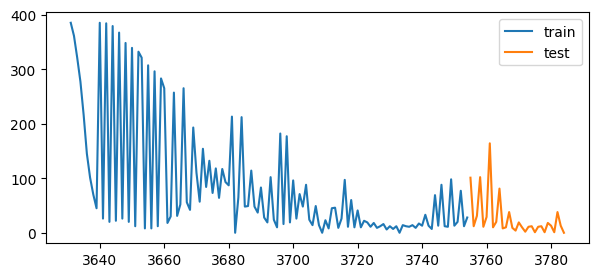

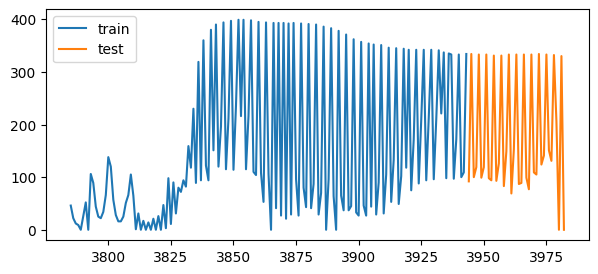

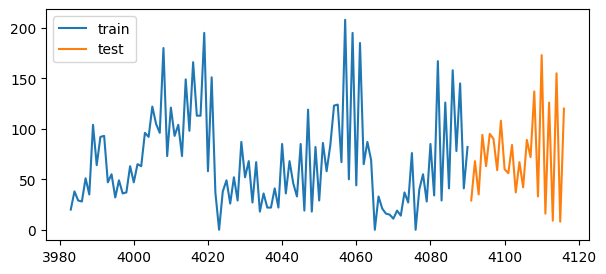

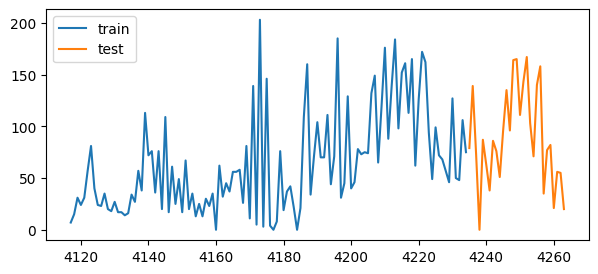

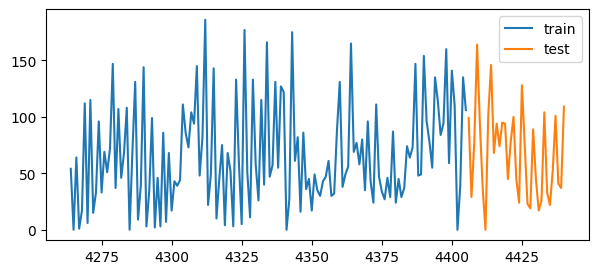

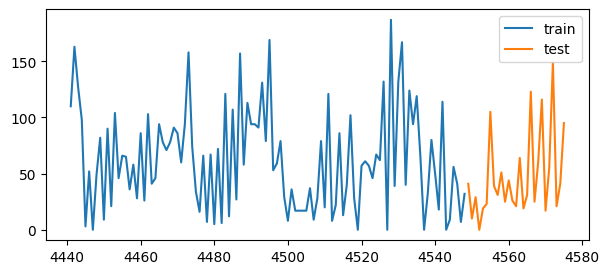

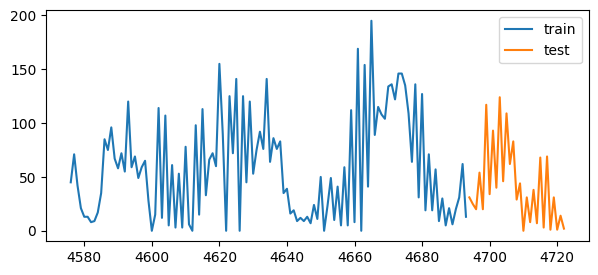

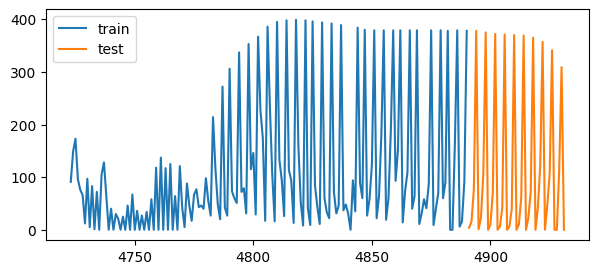

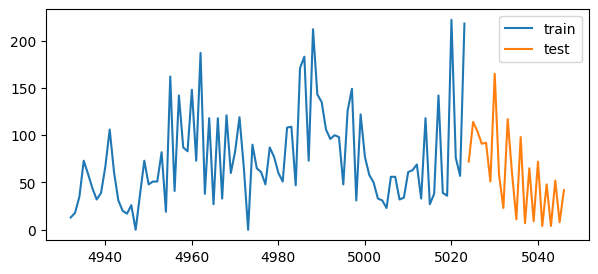

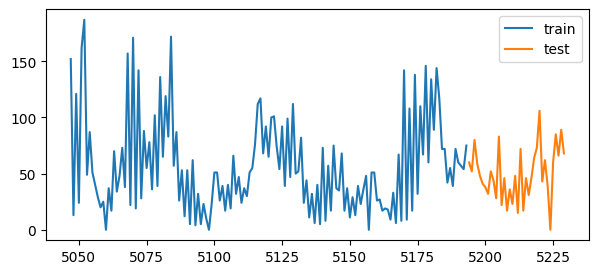

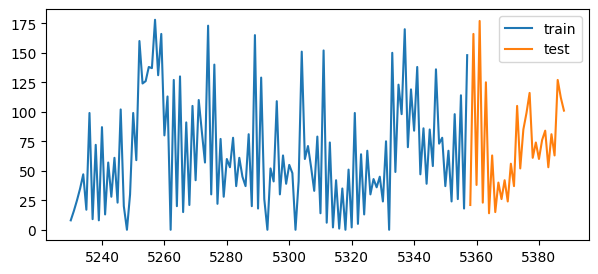

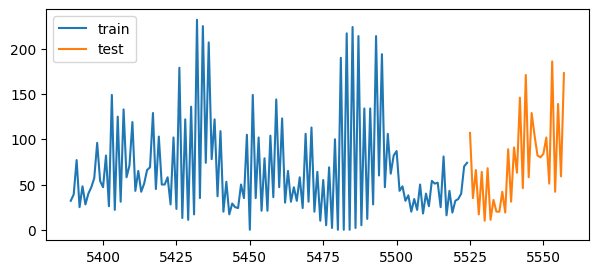

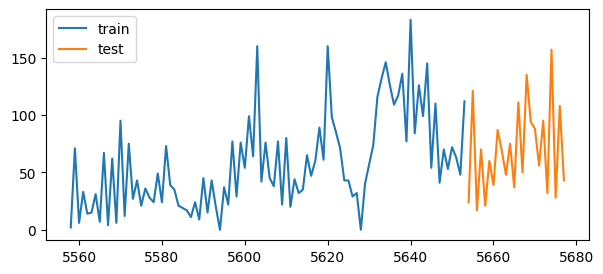

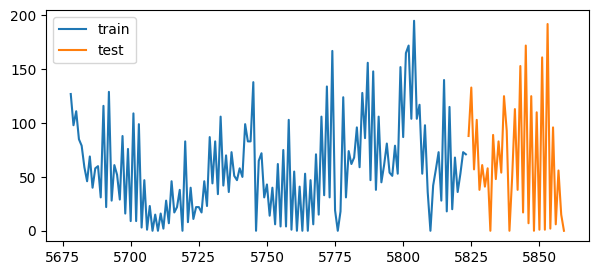

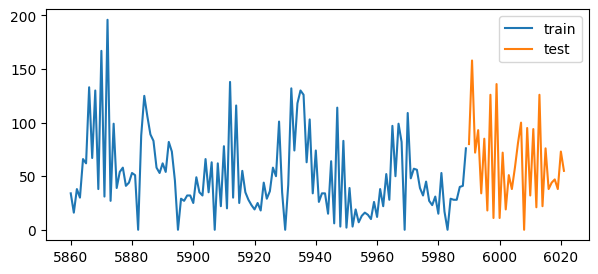

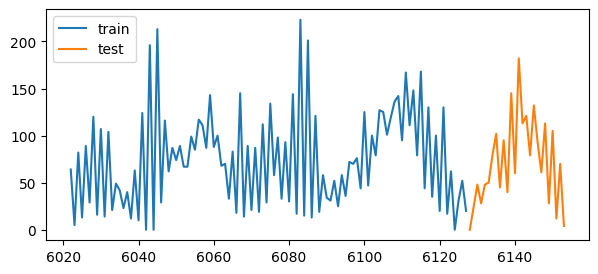

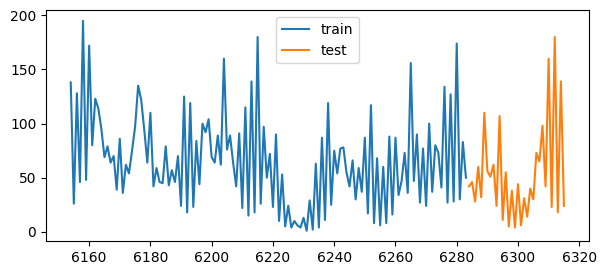

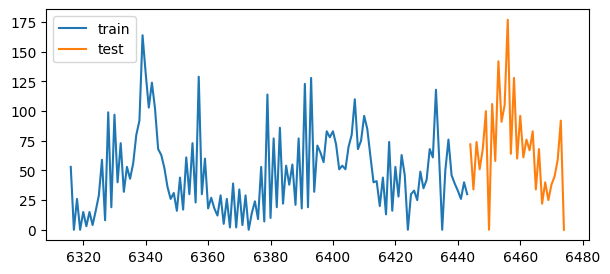

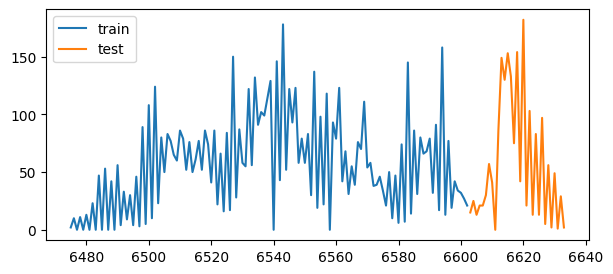

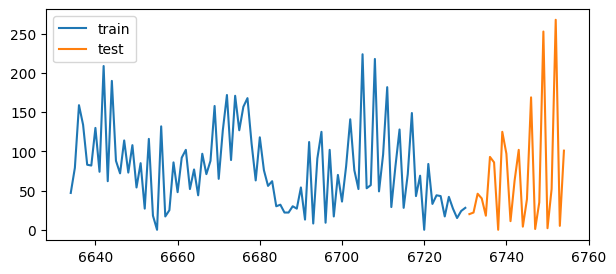

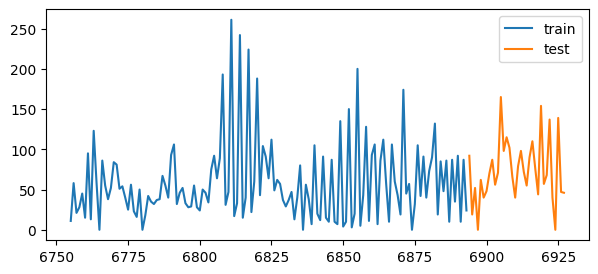

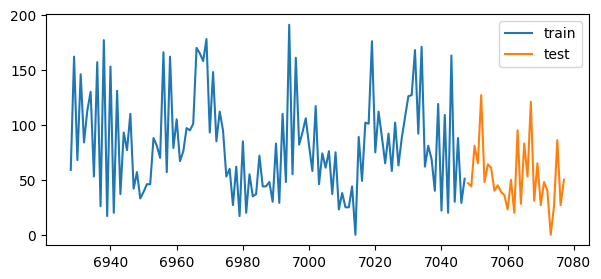

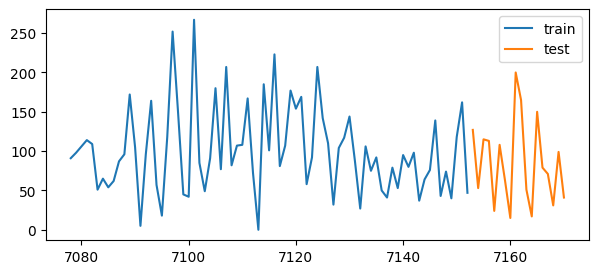

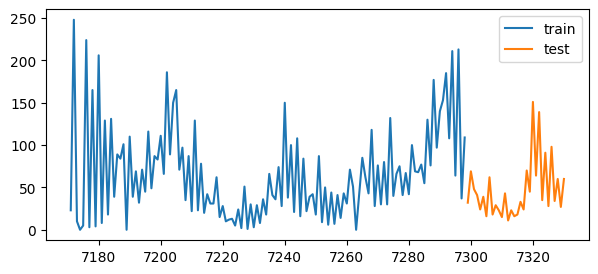

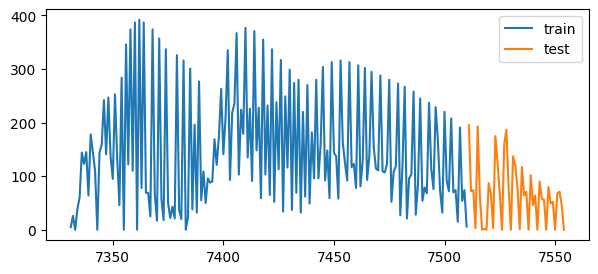

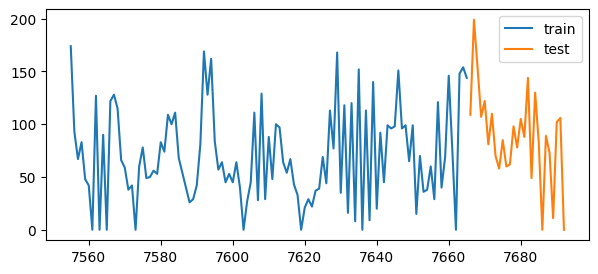

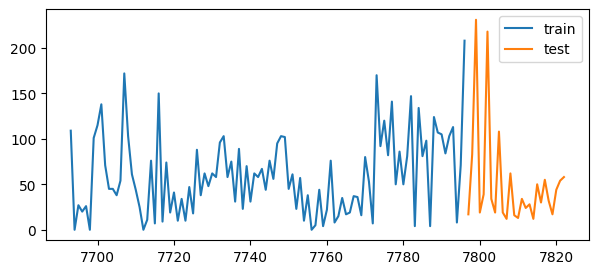

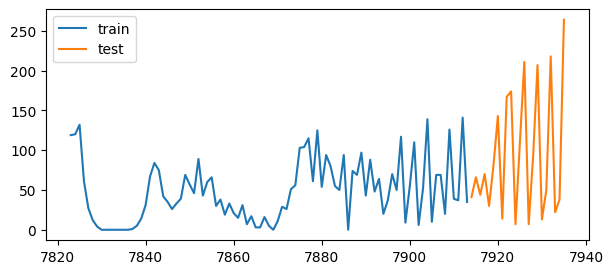

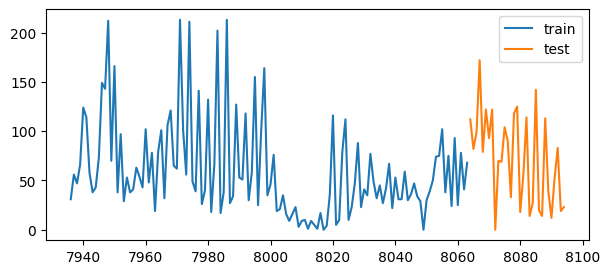

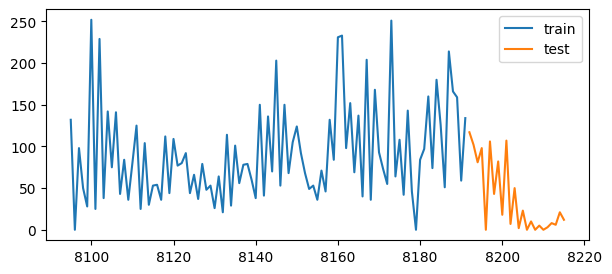

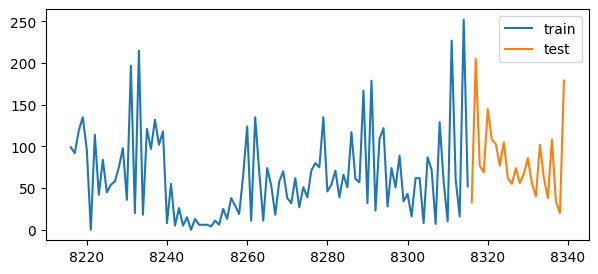

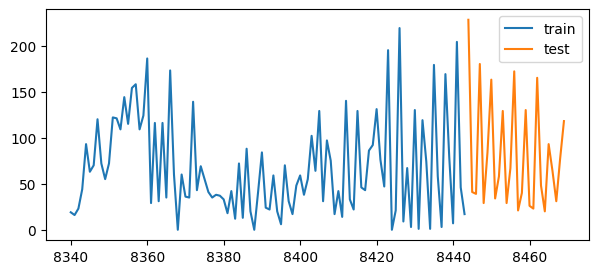

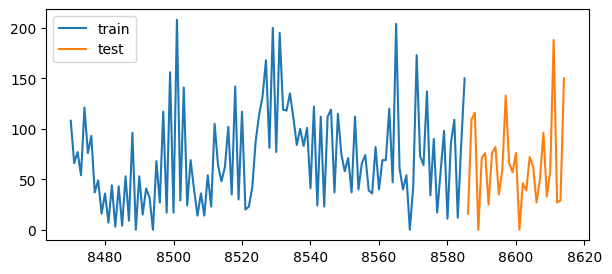

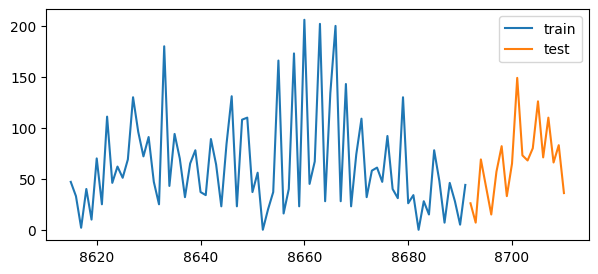

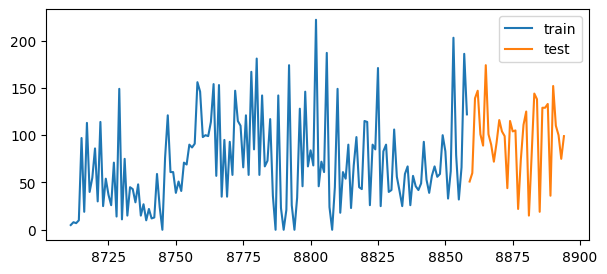

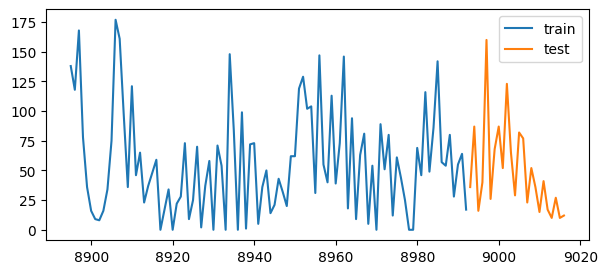

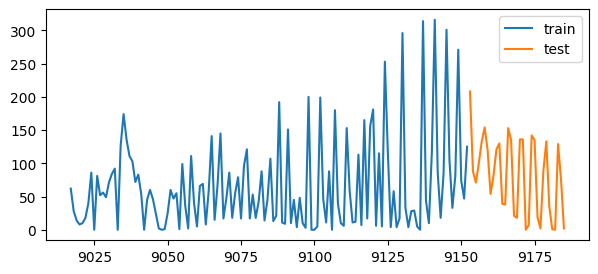

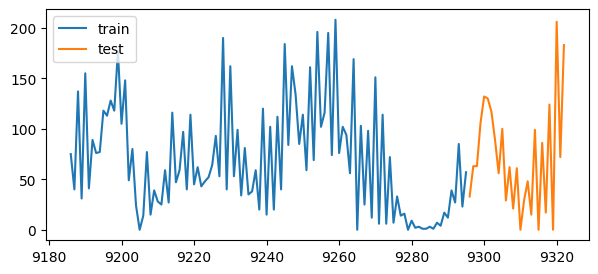

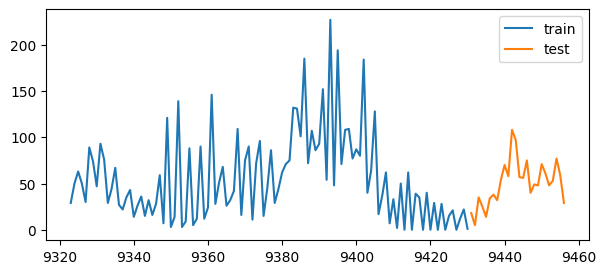

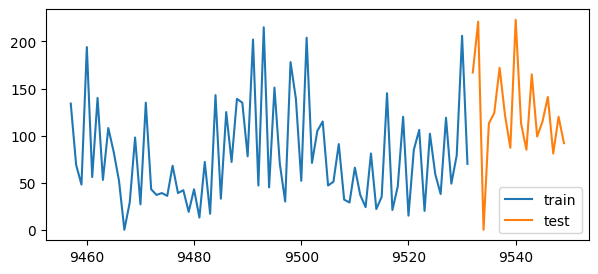

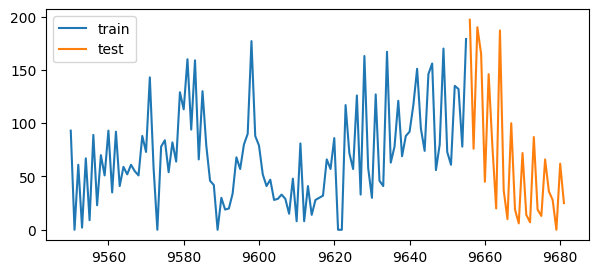

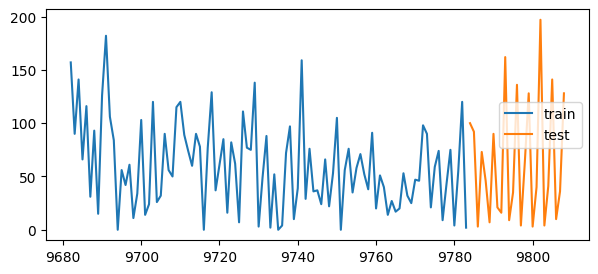

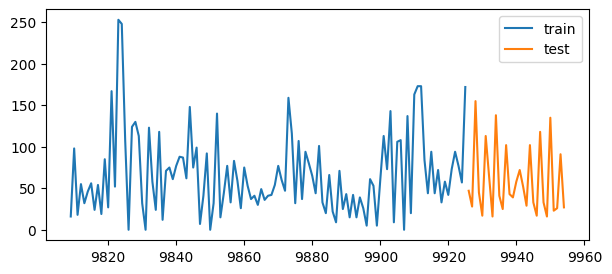

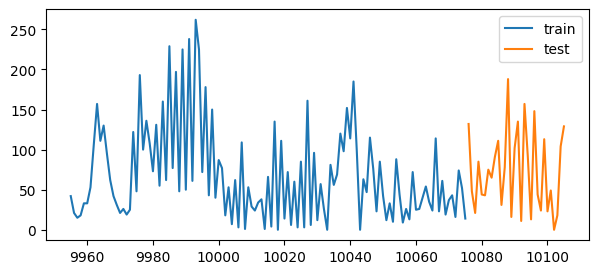

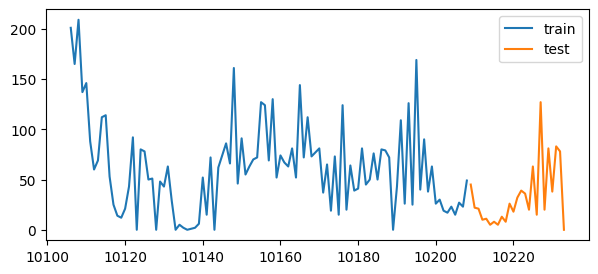

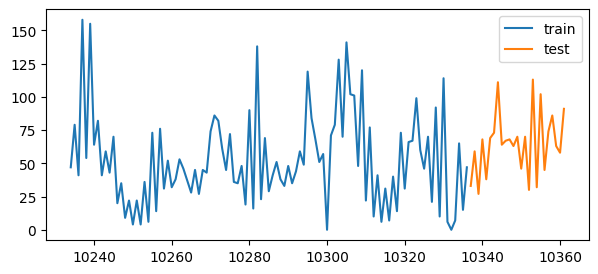

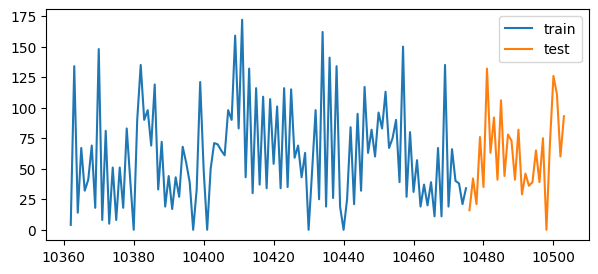

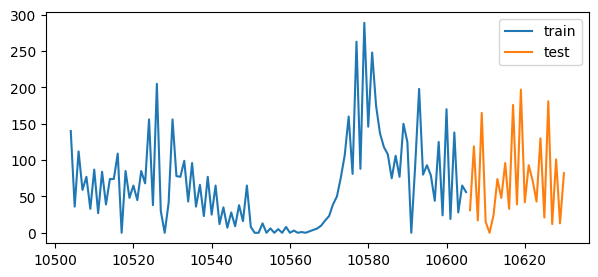

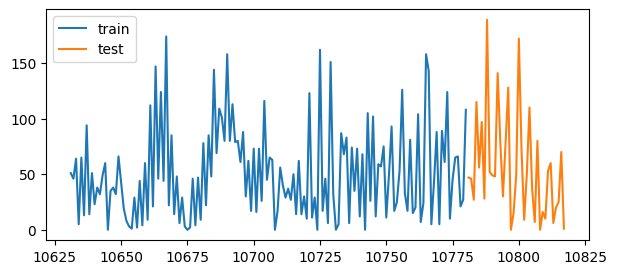

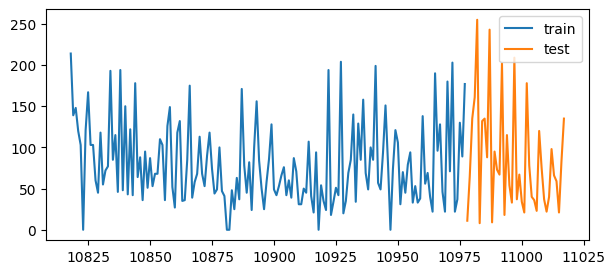

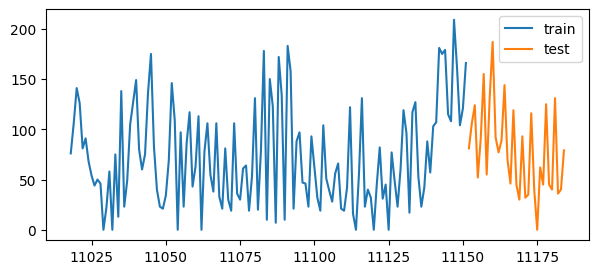

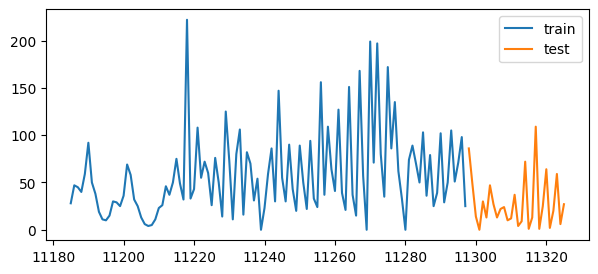

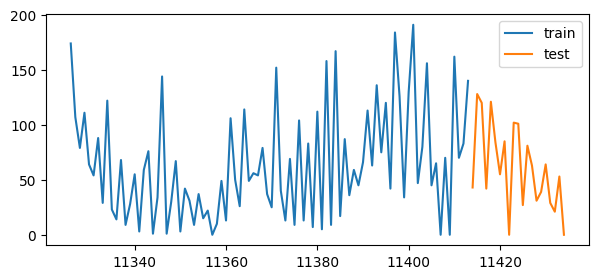

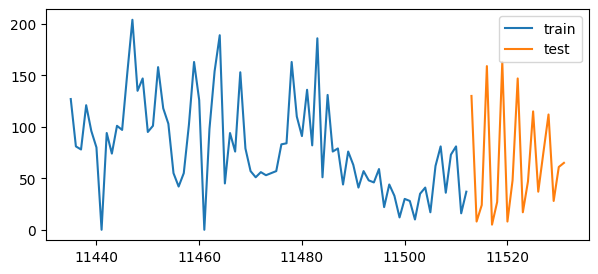

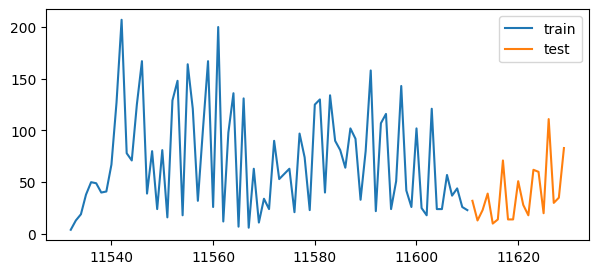

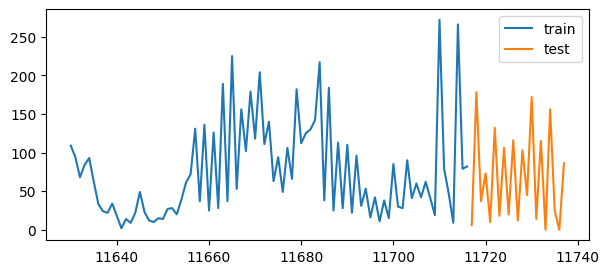

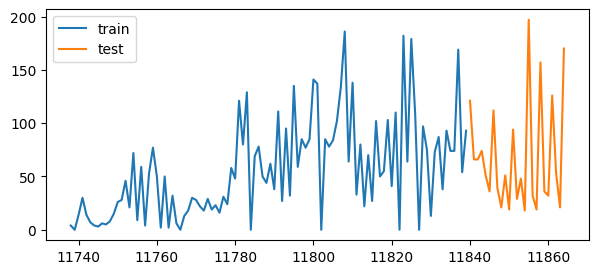

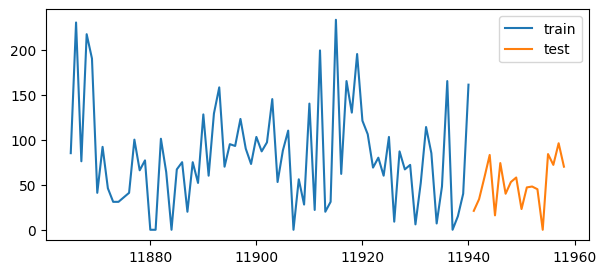

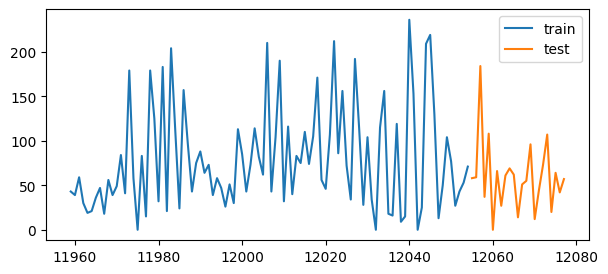

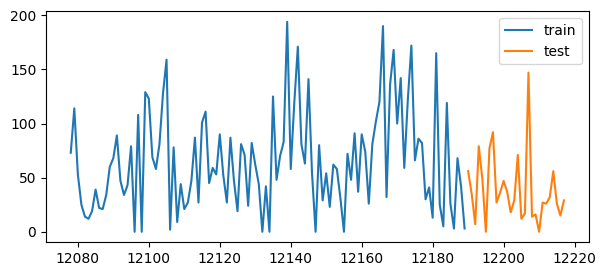

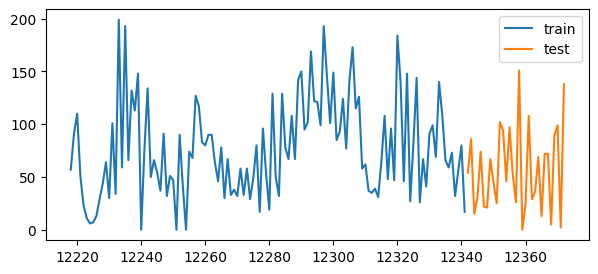

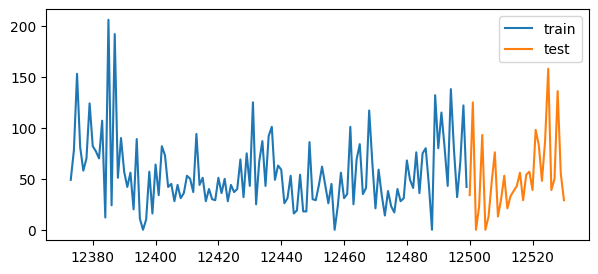

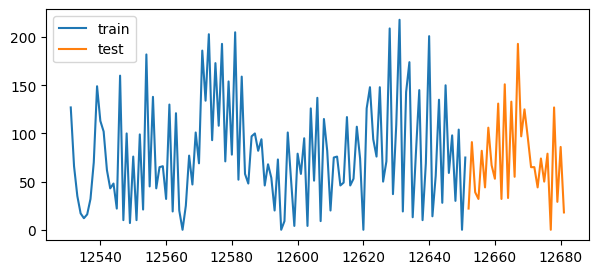

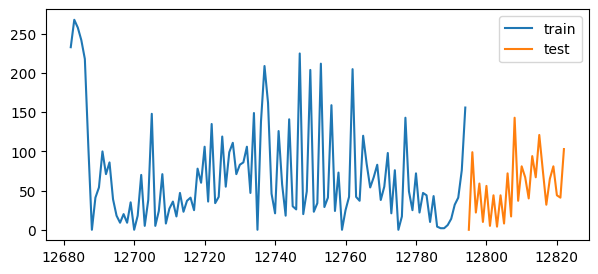

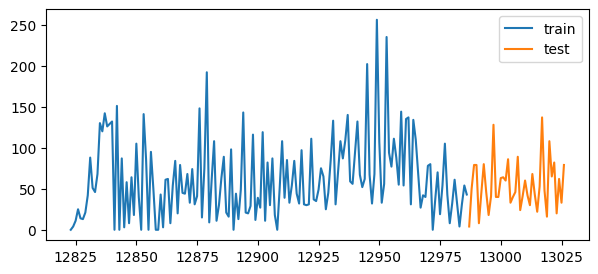

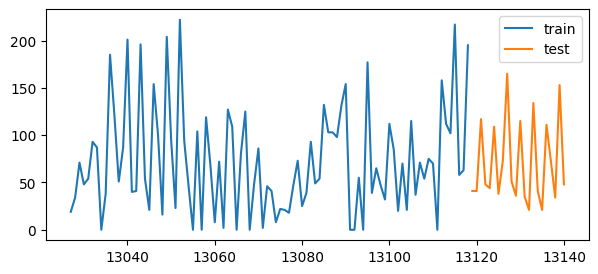

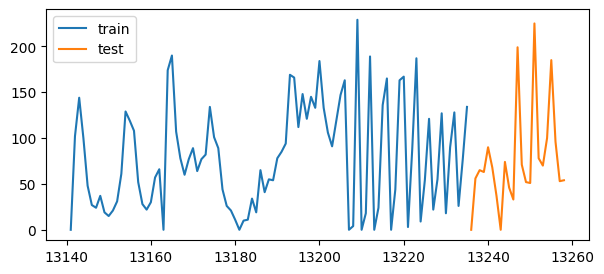

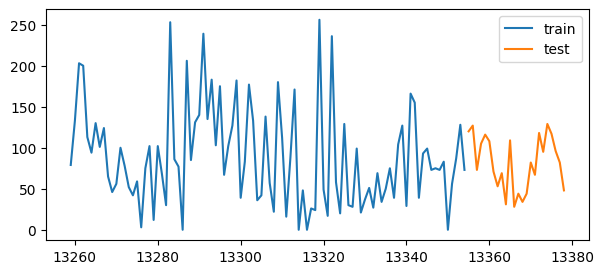

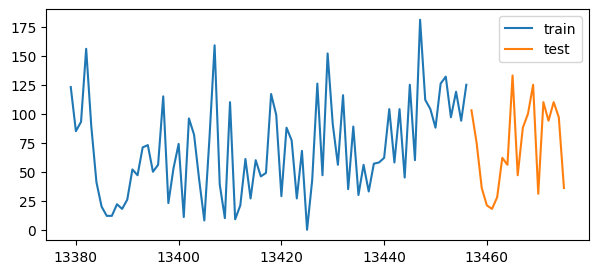

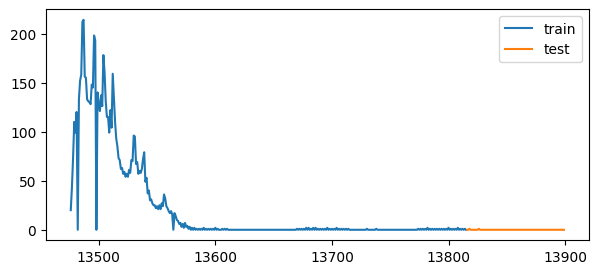

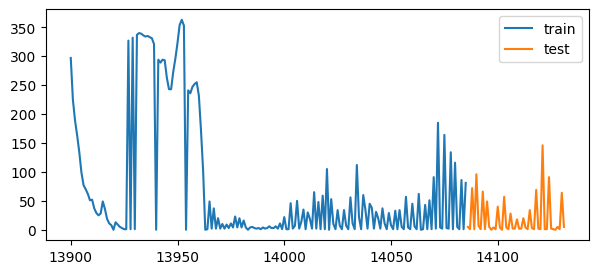

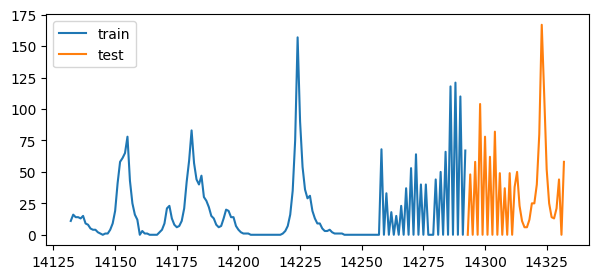

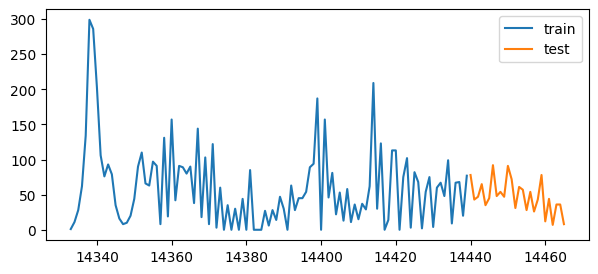

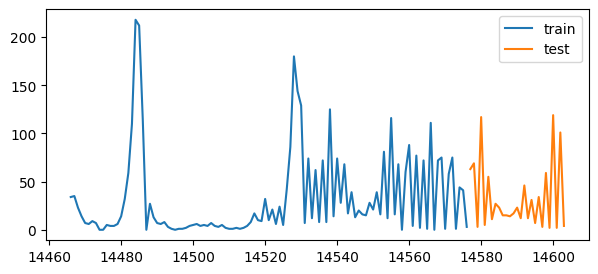

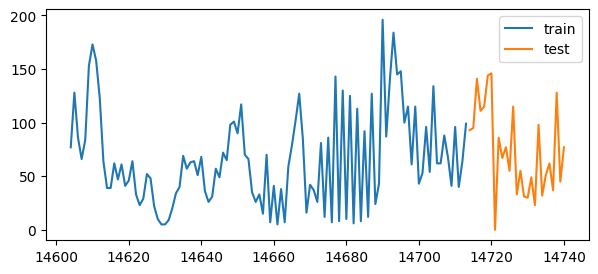

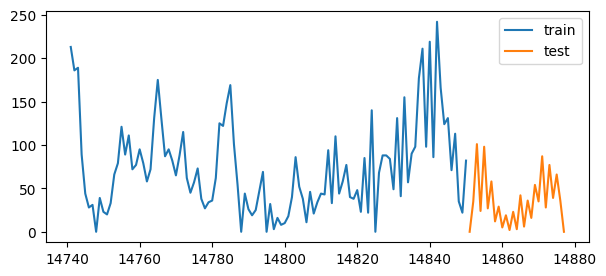

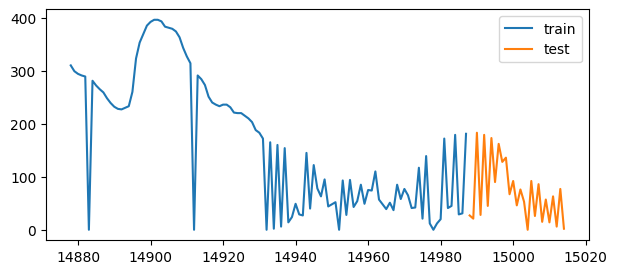

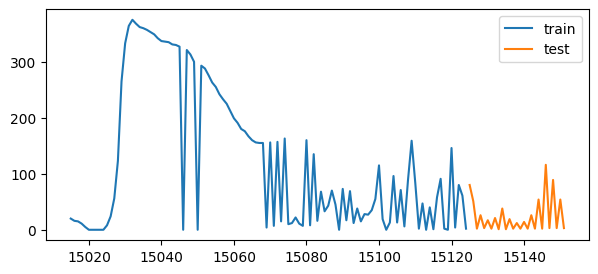

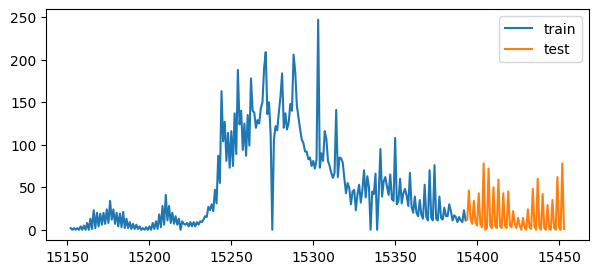

In [32]:
data_train = {}
data_test = {}
for prod in grouped_list:
    id_product = prod['product_number'].iloc[0]
    print(id_product)
    steps = int(len(prod['week']) * 0.2)
    #print(steps)
    data_train[id_product] = prod[:-steps]
    data_test[id_product] = prod[-steps:]

    print(f"Train dates : {data_train[id_product].index.min()} --- {data_train[id_product].index.max()}  (n={len(data_train[id_product])})")
    print(f"Test dates  : {data_test[id_product].index.min()} --- {data_test[id_product].index.max()}  (n={len(data_test[id_product])})")

    fig, ax = plt.subplots(figsize=(7, 3))
    data_train[id_product]['inventory_units'].plot(ax=ax, label='train')
    data_test[id_product]['inventory_units'].plot(ax=ax, label='test')
    ax.legend()    


data_train[7896]['inventory_units']
